# Estrutura Administrativa

Neste notebook, construímos os datasets relacionados ao cadastro da Estrutura Administrativa no SMAE.

Abaixo, apresentamos o DER do dataset que será construído.

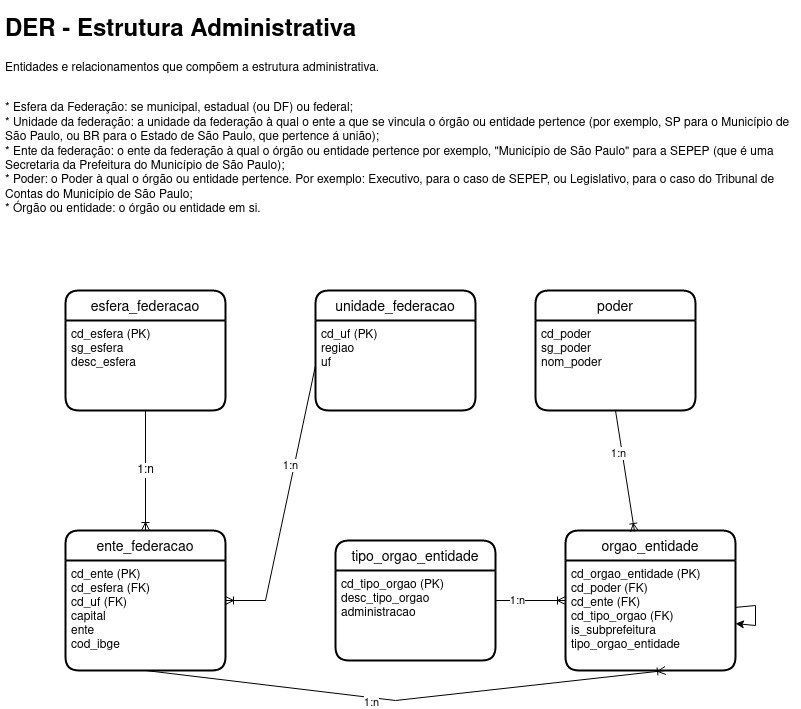

In [1]:
from IPython.display import Image
Image(filename='estrutura_administrativa.jpg') 


In [2]:
from io import StringIO
import pandas as pd
import requests

from utils import solve_path, solve_dir, check_file_exists

In [3]:
ORIGINAL_DATA_DIR = solve_dir('original_data')
GENERATED_DATA_DIR = solve_dir('generated_data')
GENERATED_DATA_DIR = solve_path('estrutura_administrativa', GENERATED_DATA_DIR)

## Órgãos e entidades da PMSP

Abaixo, extrairemos os órgãos e entidades da PMSP.

Nossa fonte de dados são os datasets do SIGPEC (Sistema de Gestão de Pessoas da Prefeitura) disponibilizados no portal de dados abertos ('http://dados.prefeitura.sp.gov.br/').

In [4]:
link_dataset = ('http://dados.prefeitura.sp.gov.br/dataset/'
                'bf5df0f4-4fb0-4a5e-b013-07d098cc7b1c/resource/5a12b935-73e0-404b-97ec-7a52802d099f/'
                'download/verificadoativos01-08-2022jul-2022.csv')

In [5]:
def download_csv_dataset(link):
    
    print('Fazendo download dos dados')
    with requests.get(link) as r:
        io = StringIO(r.text)
        
    df = pd.read_csv(io, sep=';', decimal=',',
                    encoding='latin-1')
    
    return df

In [6]:
def save_df(df, fname, folder):
    
    fname = solve_path(fname, folder)
    
    try:
        df.to_csv(fname, sep =';', decimal=',', 
                  encoding='latin-1', index=False)
    except UnicodeEncodeError:
        df.to_csv(fname, sep =';', decimal=',', 
                  encoding='utf-8', index=False)
    
def open_df(fname, folder):
    
    
    if check_file_exists(fname, folder):
        print('Abrindo dataframe existente')
        return pd.read_csv(solve_path(fname, folder), sep=';',
                          encoding='latin-1', decimal=',')
    return None

In [7]:
def pipeline_open_df(fname, folder= ORIGINAL_DATA_DIR, link = link_dataset):
    
    df = open_df(fname, folder)
    
    if df is None:
        df = download_csv_dataset(link)
        save_df(df, fname, folder)
    
    return df

In [8]:
df = pipeline_open_df('dataset_funcionalismo.csv')

Abrindo dataframe existente


In [9]:
df.sample(3)

,REGISTRO,VINCULO,NOME,CARGO_BASICO,REF_CARGO_BAS,SEGMENTO,GRUPO,SUBGRUPO,ESCOL_CARGO_BASICO,CARGO_COMISSAO,...,JORNADA,DATA_INICIO_EXERC,REL_JUR_ADM,SECRET_SUBPREF,SETOR,ORGAO_EXT,SEXO,ANO_NASCIMENTO,RACA,DEFICIENTE
80886,8079013,1,VERA LUCIA FIDELIS ALVES,PROFESSOR ENSINO FUNDAMENTAL II E MEDIO CAT 3,QPE18B,INGLES,QPE LEI 14660/07,DOCENTE,LICENCIATURA PLENA COMPLETA,NaN,...,JEI FORMACAO,15/03/2013,EFETIVO,SECRETARIA MUNICIPAL DE EDUCACAO,EMEF ALTINO ARANTES,NaN,F,1966,BRANCA,NAO
104234,8420475,1,LEIDIANE CORREIA DA SILVA,PROFESSOR ENSINO FUNDAMENTAL II E MEDIO CAT 3,QPE14A,GEOGRAFIA,QPE LEI 14660/07,DOCENTE,LICENCIATURA PLENA COMPLETA,NaN,...,JB DOCENTE,10/04/2019,EFETIVO,SECRETARIA MUNICIPAL DE EDUCACAO,EMEF MARIO KOSEL FILHO,NaN,F,1989,PARDA,NAO
90312,8223165,2,APARECIDA DA CRUZ CARDOSO,PROFESSOR ENSINO FUNDAMENTAL II E MEDIO CAT 3,QPE14B,ARTE,QPE LEI 14660/07,DOCENTE,LICENCIATURA PLENA COMPLETA,NaN,...,JEI FORMACAO,03/08/2017,EFETIVO,SECRETARIA MUNICIPAL DE EDUCACAO,EMEF JARDIM DA CONQUISTA,NaN,F,1978,PRETA,NAO


In [10]:
df.columns

Index(['REGISTRO', 'VINCULO', 'NOME', 'CARGO_BASICO', 'REF_CARGO_BAS',
       'SEGMENTO', 'GRUPO', 'SUBGRUPO', 'ESCOL_CARGO_BASICO', 'CARGO_COMISSAO',
       'REF_CARGO_COM', 'ESCOL_CARGO_COMISSAO', 'JORNADA', 'DATA_INICIO_EXERC',
       'REL_JUR_ADM', 'SECRET_SUBPREF', 'SETOR', 'ORGAO_EXT', 'SEXO',
       'ANO_NASCIMENTO', 'RACA', 'DEFICIENTE'],
      dtype='object')

In [11]:
orgaos = df['SECRET_SUBPREF'].unique()

In [12]:
orgaos[:10]

array(['SECRETARIA MUNICIPAL DE GESTAO',
       'SECRETARIA MUNICIPAL DE EDUCACAO', 'SUBPREFEITURA LAPA',
       'PROCURADORIA GERAL DO MUNICIPIO',
       'SUBPREFEITURA SANTANA/TUCURUVI',
       'SECRETARIA DE GOVERNO MUNICIPAL',
       'SECRETARIA MUNICIPAL DO VERDE E DO MEIO AMBIENTE',
       'SUBPREFEITURA PINHEIROS', 'SUBPREFEITURA CAPELA DO SOCORRO',
       'SUBPREFEITURA MOOCA'], dtype=object)

In [13]:
df['subprefeitura'] = df['SECRET_SUBPREF'].str.startswith('SUB').apply(lambda x: False if pd.isnull(x) else x)
df['secretaria'] = df['SECRET_SUBPREF'].str.startswith('SECR').apply(lambda x: False if pd.isnull(x) else x)

In [14]:
subs = df[df['subprefeitura']]['SECRET_SUBPREF'].unique()

In [15]:
len(subs)

32

In [16]:
subs

array(['SUBPREFEITURA LAPA', 'SUBPREFEITURA SANTANA/TUCURUVI',
       'SUBPREFEITURA PINHEIROS', 'SUBPREFEITURA CAPELA DO SOCORRO',
       'SUBPREFEITURA MOOCA', 'SUBPREFEITURA JABAQUARA',
       'SUBPREFEITURA SAO MATEUS', 'SUBPREFEITURA SE',
       'SUBPREFEITURA JACANA/TREMEMBE', 'SUBPREFEITURA SAO MIGUEL',
       'SUBPREFEITURA CASA VERDE/CACHOEIRINHA',
       'SUBPREFEITURA FREGUESIA DO O/BRASILANDIA',
       'SUBPREFEITURA VILA MARIANA', 'SUBPREFEITURA CAMPO LIMPO',
       'SUBPREFEITURA ARICANDUVA/FORMOSA/CARRAO',
       'SUBPREFEITURA VILA MARIA/VILA GUILHERME',
       'SUBPREFEITURA CIDADE ADEMAR', 'SUBPREFEITURA IPIRANGA',
       'SUBPREFEITURA BUTANTA', 'SUBPREFEITURA SAPOPEMBA',
       'SUBPREFEITURA PIRITUBA/JARAGUA', "SUBPREFEITURA M'BOI MIRIM",
       'SUBPREFEITURA SANTO AMARO', 'SUBPREFEITURA ERMELINO MATARAZZO',
       'SUBPREFEITURA CIDADE TIRADENTES', 'SUBPREFEITURA VILA PRUDENTE',
       'SUBPREFEITURA ITAQUERA', 'SUBPREFEITURA GUAIANASES',
       'SUBPREFEITURA PE

In [17]:
secretarias = df[df['secretaria']]['SECRET_SUBPREF'].unique()

In [18]:
secretarias

array(['SECRETARIA MUNICIPAL DE GESTAO',
       'SECRETARIA MUNICIPAL DE EDUCACAO',
       'SECRETARIA DE GOVERNO MUNICIPAL',
       'SECRETARIA MUNICIPAL DO VERDE E DO MEIO AMBIENTE',
       'SECRETARIA MUNICIPAL DAS SUBPREFEITURAS',
       'SECRETARIA MUNICIPAL DE CULTURA',
       'SECRETARIA MUNICIPAL DE URBANISMO E LICENCIAMENTO',
       'SECRETARIA MUNICIPAL DA SAUDE',
       'SECRETARIA MUNICIPAL DE MOBILIDADE E TRANSITO',
       'SECRETARIA MUNICIPAL DE ESPORTES E LAZER',
       'SECRETARIA MUNICIPAL DE ASSIST E DESENV SOCIAL',
       'SECRETARIA MUNICIPAL DE DIREITOS HUMANOS E CIDADAN',
       'SECRETARIA MUNICIPAL DE INFRAESTRUTURA URBANA E OB',
       'SECRETARIA MUNICIPAL DE SEGURANCA URBANA',
       'SECRETARIA MUNICIPAL DE HABITACAO',
       'SECRETARIA MUNICIPAL DA PESSOA COM DEFICIENCIA',
       'SECRETARIA MUNICIPAL DA FAZENDA',
       'SECRETARIA MUNICIPAL DE INOVACAO E TECNOLOGIA',
       'SECRETARIA MUNICIPAL DE DESENVOLVIMENTO ECONOMICO',
       'SECRETARIA MUNICIPA

In [19]:
outros = df[(~df['secretaria'])&(~df['subprefeitura'])]['SECRET_SUBPREF'].unique()

In [20]:
outros

array(['PROCURADORIA GERAL DO MUNICIPIO', 'CASA CIVIL',
       'GABINETE DO PREFEITO', 'CONTROLADORIA GERAL DO MUNICIPIO', nan],
      dtype=object)

## Entes da Federação

O Siconfi da Secretaria da Fazenda do Governo Federal oferece uma API que contempla todos os entes da Federação do Brasil.

Vamos normalizar essa base de dados, separando-a entre Entes, Unidades e Esferas da Federação.



In [21]:
endpoint_entes = 'https://apidatalake.tesouro.gov.br/ords/siconfi/tt/entes'

In [22]:
def get_entes(endpoint = endpoint_entes):
    
    print('Fazendo download dos dados da API')
    with requests.get(endpoint) as r:
        return r.json()
    
    
def df_entes(dados_json=None):
    
    if dados_json is None:
        dados_json = get_entes()
        
    assert not dados_json['hasMore']
    
    df = pd.DataFrame(dados_json['items'])
    
    return df

def pipeline_df_entes(fname= 'entes.csv', folder=ORIGINAL_DATA_DIR,
                     link=endpoint_entes):
    
    df = open_df(fname, folder)
    
    if df is None:
        df = df_entes()
        save_df(df, fname, folder)
    
    return df

In [23]:
entes = pipeline_df_entes()

Abrindo dataframe existente


In [24]:
entes.sample(10)

,cod_ibge,ente,capital,regiao,uf,esfera,exercicio,populacao,cnpj
1230,2932507,Una,0,NE,BA,M,2022,18108,1.367261e+13
3643,2607505,Itaíba,0,NE,PE,M,2022,26268,1.128638e+13
314,3156809,Sabinópolis,0,SE,MG,M,2022,15364,1.830745e+13
2366,3546702,Santa Gertrudes,0,SE,SP,M,2022,27850,4.573238e+13
2893,4301750,Barão do Triunfo,0,SU,RS,M,2022,7550,9.190037e+13
160,3114550,Carneirinho,0,SE,MG,M,2022,10103,2.604252e+13
3692,2611533,Quixaba,0,NE,PE,M,2022,6796,3.544553e+13
1670,4117057,Nova Laranjeiras,0,SU,PR,M,2022,11462,9.558765e+13
74,2902252,Arataca,0,NE,BA,M,2022,10904,1.365816e+13
2497,3518800,Guarulhos,0,SE,SP,M,2022,1404694,4.631900e+13


In [25]:
entes['esfera'].unique()

array(['M', 'U', 'E', 'D'], dtype=object)

In [26]:
esferas = entes['esfera'].unique()

In [27]:
esferas = pd.DataFrame(list(zip(list(range(1,len(esferas)+1)), esferas)), 
             columns = ['cd_esfera', 'sg_esfera'])

In [28]:
esferas['desc_esfera'] = ['Município', 'União', 'Estado', 'Distrito Federal']

In [29]:
esferas

,cd_esfera,sg_esfera,desc_esfera
0,1,M,Município
1,2,U,União
2,3,E,Estado
3,4,D,Distrito Federal


In [30]:
save_df(esferas, 'esferas_federacao.csv', folder = GENERATED_DATA_DIR)

In [31]:
ufs = entes[['regiao', 'uf']]
ufs = ufs.drop_duplicates()
ufs.reset_index(drop=True, inplace=True)

In [32]:
ufs['cd_uf'] = ufs.index

In [33]:
ufs.sample(5)

,regiao,uf,cd_uf
11,SU,RS,11
31,CO,MT,31
32,CO,DF,32
8,SE,SP,8
6,NE,PE,6


In [34]:
save_df(ufs, 'unidades_federacao.csv', folder = GENERATED_DATA_DIR)

In [35]:
entes = pd.merge(entes, esferas, how='left', left_on='esfera', right_on='sg_esfera')

In [36]:
entes = pd.merge(entes, ufs, how='left', on=['uf', 'regiao'])

In [37]:
entes.sample(2)

,cod_ibge,ente,capital,regiao,uf,esfera,exercicio,populacao,cnpj,cd_esfera,sg_esfera,desc_esfera,cd_uf
1392,2925758,Presidente Tancredo Neves,0,NE,BA,M,2022,28272,1.307125e+13,1,M,Município,1
1587,4110656,Iracema do Oeste,0,SU,PR,M,2022,2216,9.558356e+13,1,M,Município,9


In [38]:
cols_interesse_entes = ['cod_ibge', 'ente', 'capital', 'cd_esfera', 'cd_uf']

In [39]:
entes = entes[cols_interesse_entes]

In [40]:
entes = entes[cols_interesse_entes].copy()

In [41]:
entes.reset_index(inplace=True, drop=True)
entes['cd_ente'] = entes.index

In [42]:
save_df(entes, 'entes_federacao.csv', folder = GENERATED_DATA_DIR)

In [43]:
entes.sample(3)

,cod_ibge,ente,capital,cd_esfera,cd_uf,cd_ente
1681,4117503,Paiçandu,0,1,9,1681
5130,5103809,Figueirópolis D'Oeste,0,1,31,5130
1501,3500907,Altair,0,1,8,1501


## Poderes

In [44]:
poderes = pd.DataFrame({
    'cd_poder' : list(range(4)),
    'sg_poder' : ['JUD', 'EXEC', 'LEGIS', 'MP'],
    'nom_poder' : ['Judiciário', 'Executivo', 'Legistlativo', 'Ministério Público']
})

In [45]:
poderes

,cd_poder,sg_poder,nom_poder
0,0,JUD,Judiciário
1,1,EXEC,Executivo
2,2,LEGIS,Legistlativo
3,3,MP,Ministério Público


In [46]:
save_df(poderes, 'poderes.csv', folder = GENERATED_DATA_DIR)

## Vinculando órgãos e entidades aos entes


A seguir vamos vincular os órgãos e entidades extraídos aos entes.

In [47]:
entes[entes['ente']=='São Paulo']

,cod_ibge,ente,capital,cd_esfera,cd_uf,cd_ente
2954,3550308,São Paulo,1,1,8,2954
4001,35,São Paulo,0,3,20,4001


In [48]:
def build_df_orgao_entidade(array, tipo, subprefeitura, cd_poder=1, cd_ente=2954):
    
    repeat = lambda x: [x for i in range(len(array))]
    
    df = pd.DataFrame({
        'nom_orgao_entidade' : array,
        'tipo_orgao_entidade' : repeat(tipo),
        'cd_poder' : repeat(cd_poder),
        'cd_ente' : repeat(cd_ente),
        'is_subprefeitura' : repeat(subprefeitura)
                       })
    
    return df

In [49]:
df_secretarias = build_df_orgao_entidade(secretarias, 'orgao', False)

In [50]:
df_subs = build_df_orgao_entidade(subs, 'orgao', True)

In [51]:
df_outros = build_df_orgao_entidade(outros, 'orgao', False)

In [52]:
orgaos = pd.concat([df_secretarias, df_subs, df_outros])

In [53]:
orgaos = orgaos[orgaos['nom_orgao_entidade'].notnull()].copy()

In [54]:
indiretas = [
    'AMLURB - Autoridade Municipal de Limpeza Urbana',
    'HSPM - Hospital do Servidor Público Municipal',
    'IPREM - Instituto de Previdência Municipal de São Paulo',
    'SFMSP - Serviço Funerário do Município de São Paulo',
    'SP Regula - Agência Reguladora de Serviços Públicos',
    'CET - Companhia de Engenharia de Tráfego',
    'COHAB-SP - Companhia Metropolitana de Habitação de São Paulo',
    'PRODAM - Empresa de Tecnologia da Informação e Comunicação do Município de São Paulo',
    'SPCine - Empresa de Cinema e Audiovisual de São Paulo',
    'SP Negócios - São Paulo Negócios',
    'SPOBRAS – São Paulo Obras',
    'SP Parcerias - São Paulo Parcerias',
    'SPUrbanismo – São Paulo Urbanismo',
    'SPDA – Companhia São Paulo de Desenvolvimento e Mobilização de Ativos',
    'SPSEC - SSP Securitização - Companhia Paulistana de Securitização',
    'SPTrans - São Paulo Transporte',
    'SPTuris – São Paulo Turismo',
    'Fundação Paulistana de Educação, Tecnologia e Cultura',
    'TMSP - Fundação Theatro Municipal de São Paulo'
]

In [55]:
indiretas = [item.upper() for item in indiretas]

In [56]:
df_indireta = build_df_orgao_entidade(indiretas, 'entidade', False)

In [57]:
orgao_entidade = pd.concat([orgaos, df_indireta])

In [58]:
entes[entes['ente']=='São Paulo']

,cod_ibge,ente,capital,cd_esfera,cd_uf,cd_ente
2954,3550308,São Paulo,1,1,8,2954
4001,35,São Paulo,0,3,20,4001


In [59]:
outros = pd.DataFrame({
        'nom_orgao_entidade' : [
                    'TRIBUNAL DE CONTAS DO MUNICÍPIO DE SÃO PAULO',
                    'CÂMARA DE VEREADORES DO MUNICÍPIO DE SÃO PAULO',
                    'TRIBUNAL DE CONTAS DO ESTADO DE SÃO PAULO',
                    'ASSEMBLÉIA LEGISLATIVA DO ESTADO DE SÃO PAULO',
                    'MINISTÉRIO PÚBLICO DO ESTADO DE SÃO PAULO',
                    
                ],
        'tipo_orgao_entidade' : ['entidade' for i in range(5)],
        'cd_poder' : [2, 2, 2, 2, 3],
        'cd_ente' : [2954, 2954, 4001, 4001, 4001],
        'is_subprefeitura' : [False for i in range(5)]
})

In [60]:
df_tipo_orgao_entidade = pd.DataFrame(
                        {'cd_tipo_orgao' : [1,2],
                        'desc_tipo_orgao' : ['orgao', 'entidade'],
                        'administracao' : ['direta', 'indireta']}
                        )

In [61]:
df_tipo_orgao_entidade

,cd_tipo_orgao,desc_tipo_orgao,administracao
0,1,orgao,direta
1,2,entidade,indireta


In [62]:
save_df(df_tipo_orgao_entidade, 'tipo_orgao_entidade.csv', GENERATED_DATA_DIR)

In [63]:
final = pd.concat([orgao_entidade, outros])

In [64]:
final['cd_tipo_orgao'] = final['tipo_orgao_entidade'].apply(lambda x: 1 if 'orgao' else 2)

In [65]:
final.drop('tipo_orgao_entidade', axis=1, inplace=True)

In [66]:
final['cd_orgao_entidade'] = final.reset_index()['index']

In [67]:
save_df(final, 'orgao_entidade.csv', folder = GENERATED_DATA_DIR)

In [68]:
final.head()

,nom_orgao_entidade,cd_poder,cd_ente,is_subprefeitura,cd_tipo_orgao,cd_orgao_entidade
0,SECRETARIA MUNICIPAL DE GESTAO,1,2954,False,1,0
1,SECRETARIA MUNICIPAL DE EDUCACAO,1,2954,False,1,1
2,SECRETARIA DE GOVERNO MUNICIPAL,1,2954,False,1,2
3,SECRETARIA MUNICIPAL DO VERDE E DO MEIO AMBIENTE,1,2954,False,1,3
4,SECRETARIA MUNICIPAL DAS SUBPREFEITURAS,1,2954,False,1,4


In [69]:
esferas.head()

,cd_esfera,sg_esfera,desc_esfera
0,1,M,Município
1,2,U,União
2,3,E,Estado
3,4,D,Distrito Federal


In [70]:
ufs.head()

,regiao,uf,cd_uf
0,NE,SE,0
1,NE,BA,1
2,SE,MG,2
3,SE,ES,3
4,SE,RJ,4


In [71]:
poderes.head()

,cd_poder,sg_poder,nom_poder
0,0,JUD,Judiciário
1,1,EXEC,Executivo
2,2,LEGIS,Legistlativo
3,3,MP,Ministério Público


In [72]:
entes.head()

,cod_ibge,ente,capital,cd_esfera,cd_uf,cd_ente
0,2803104,Itabi,0,1,0,0
1,2803203,Itaporanga d'Ajuda,0,1,0,1
2,2803302,Japaratuba,0,1,0,2
3,2803401,Japoatã,0,1,0,3
4,2803500,Lagarto,0,1,0,4
